In [18]:
%pylab inline
import numpy as np
from matplotlib import cm
from matplotlib import rc
import matplotlib.pylab as plb
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)
rc('mathtext', fontset = 'stix')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BIGGEST_SIZE = 16

rc('font', size=SMALL_SIZE)          # controls default text sizes
rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
rc('figure', titlesize=BIGGEST_SIZE) 
pk = {'color':'gray','lw':1, 'ls':'dotted'}

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['TH', 'rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [19]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as plb
import pandas as pd
import scipy, astropy, os, radmc3dPy
from radmc3dPy import *

In [20]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/python_examples/test_cutoff')

# Cutoff Model

In [21]:
analyze.writeDefaultParfile('ppdisk')
par = analyze.readParams()

Writing problem_params.inp


In [22]:
setup.problemSetupDust('ppdisk', mdisk=0, rdisk='60*au', sig0=4.3, sigma_type=1, gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')

Writing problem_params.inp
Writing dustopac.inp
Writing wavelength_micron.inp
Writing amr_grid.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing dust_density.binp
Writing radmc3d.inp


In [23]:
model = radmc3dPy.setup.radmc3dModel('ppdisk', mdisk=0, rdisk='60*au', sig0=4.3, sigma_type=1, gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')

model.writeRadmc3dInp()
model.makeGrid(writeToFile=True)
model.makeRadSources(writeToFile=True)

model.makeDustOpac()
model.makeVar(ddens=True, writeToFile=True)
data = analyze.readData(ddens=True)

Writing problem_params.inp
Writing radmc3d.inp
Writing wavelength_micron.inp
Writing amr_grid.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing dustopac.inp
Writing dust_density.binp
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.binp


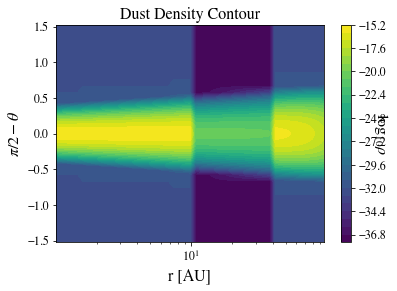

In [24]:
c = plb.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.rhodust[:,:,0,0].T), 30)
plb.xlabel('r [AU]')
plb.ylabel(r'$\pi/2-\theta$')
plb.xscale('log')
plb.title('Dust Density Contour')
cb = plb.colorbar(c)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

# Dust Opacity Plot

In [25]:
opac = analyze.readOpac(ext=['silicate'])
opac = analyze.readOpac(idust=[0])

Reading dustkappa_silicate.inp
Reading dustkappa_silicate.inp


Text(0, 0.5, '$\\kappa_{\\rm abs}$ [cm$^2$/g]')

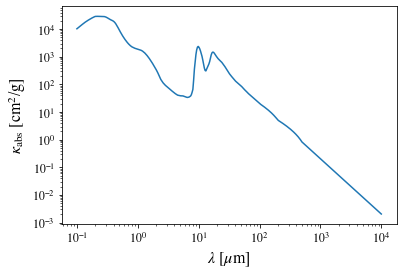

In [26]:
plb.loglog(opac.wav[0], opac.kabs[0])
plb.xlabel(r'$\lambda$ [$\mu$m]')
plb.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')

In [27]:
os.system('radmc3d mctherm')

32512

In [28]:
data = analyze.readData(dtemp=True)
data.readDustTemp()

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_temperature.bdat
Reading dust_temperature.bdat


Text(0.5, 1.0, '2D Temperature Contour - Cutoff')

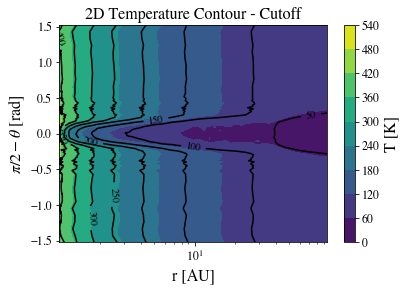

In [29]:
c = plb.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, cmap='viridis')
plb.xlabel('r [AU]')
plb.ylabel(r'$\pi/2-\theta$ [rad]')
plb.xscale('log')
cb = plb.colorbar(c)
cb.set_label('T [K]', rotation=90.)

c = plb.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 10,  colors='k', linestyles='solid')
plb.clabel(c, inline=1, fontsize=10)
plb.title('2D Temperature Contour - Cutoff')

#plb.savefig('/Users/Maya/Desktop/temperature_cutoff.png', dpi=500, bbox_inches='tight')

In [30]:
data_r = data.grid.x/natconst.au
data_th = data.grid.y
R, TH = np.meshgrid(data_r, data_th)
X = R*np.sin(TH)
Z = R*np.cos(TH)

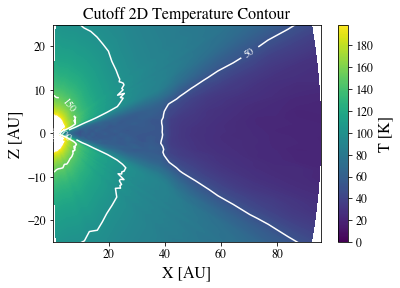

In [33]:
c = plb.contourf(X, Z, data.dusttemp[:,:,0,0].T, cmap='viridis', levels=np.arange(0,200))
plb.xlabel('X [AU]')
plb.ylabel('Z [AU]')
ylim(-25, 25)
cb = plb.colorbar(c)
cb.set_label('T [K]', rotation=90.)

c = plb.contour(X, Z, data.dusttemp[:,:,0,0].T, 10,  colors='white', linestyles='solid')
plb.clabel(c, inline=1, fontsize=10)
plb.title('Cutoff 2D Temperature Contour')

plb.savefig('/Users/Maya/Desktop/temperature_cutoff.png', dpi=500, bbox_inches='tight')

# Convenient 2D contour plots
### 2D contour plots using the function plotSlice2D()

In [15]:
data.readDustTemp()
data.readDustDens()

Reading dust_temperature.bdat
Reading dust_density.binp


Reading dustkappa_silicate.inp
Opacity at 0.50um :  28460.764433351476


/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/radmc3dPy/analyze.py:1836: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolormesh(plot_x, plot_y, pdata.T, norm=LogNorm(vmin, vmax), **kwargs)


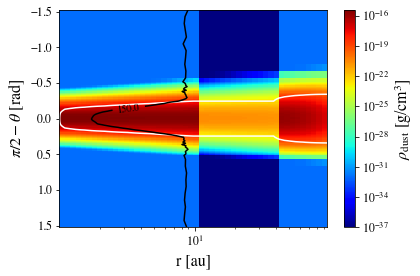

In [16]:
analyze.plotSlice2D(data, var='ddens', plane='xy', log=True, linunit='au', cmap=plb.cm.jet)
plb.xscale('log')
data.getTau(wav=0.5)
analyze.plotSlice2D(data, var='taux', plane='xy', log=True, linunit='au', contours=True, clev=[1.0], clcol='w')
analyze.plotSlice2D(data, var='dtemp', plane='xy', ispec=0, log=True, linunit='au', contours=True, clev=[150.0], clcol='k', cllabel=True)

# Make an image

In [17]:
image.makeImage(npix=300., wav=2.2, incl=0, phi=0., sizeau=300.) # inclination 

Executing RADMC-3D Command:
radmc3d image npix 300 incl 0 sizeau 300.0 lambda 2.2 phi 0.0 pointau 0.0  0.0  0.0 fluxcons


0

In [18]:
im3 = image.readImage('image3.out')

Reading image3.out


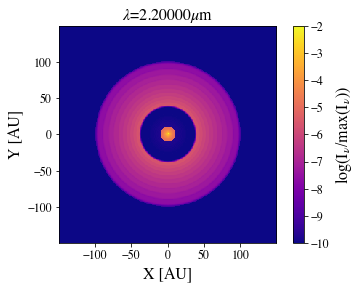

{'implot': <matplotlib.image.AxesImage at 0x12b9cca00>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x12b9e9610>}

In [19]:
image.plotImage(im3, au=True, log=True, maxlog=10, saturate=.01, cmap=plb.cm.plasma)

In [20]:
image.makeImage(npix=300., wav=2100, incl=0., phi=0., sizeau=300.) # inclination 0

Executing RADMC-3D Command:
radmc3d image npix 300 incl 0.0 sizeau 300.0 lambda 2100 phi 0.0 pointau 0.0  0.0  0.0 fluxcons


0

In [21]:
im4 = image.readImage('image4.out')

Reading image4.out


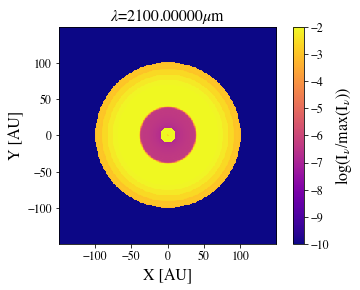

{'implot': <matplotlib.image.AxesImage at 0x12c0abd60>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x12c0ddb80>}

In [22]:
image.plotImage(im4, au=True, log=True, maxlog=10, saturate=.01, cmap=plb.cm.plasma)

# Coordinate transform

In [23]:
def i_vs_r(im):
    x,y = np.meshgrid(im.x, im.y)
    I = im.image
    R = np.sqrt(x**2 + y**2)
    r_grid = np.linspace(1, 60, 300) 
    i_profile = np.zeros_like(r_grid)
    
    for i in range(len(r_grid)):
        condition = np.abs(r_grid[i] - (R/(1.496 * 10**13))) < (np.diff(r_grid)[0] / 2)
        indices = np.where(condition)
        if(len(indices) > 0): # len(indices) != 0 
            i_profile[i] = np.mean(I[indices])
        else:
            i_profile[i] = 0
    
    return r_grid, i_profile

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Intensity vs. Radius (incl = 0, wav=2.2)')

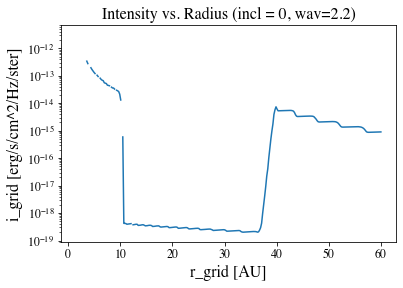

In [24]:
r_grid3, i_profile3 = i_vs_r(im3)

plt.plot(r_grid3,i_profile3)
plt.xlabel('r_grid [AU]')
plt.ylabel('i_grid [erg/s/cm^2/Hz/ster]')
plt.yscale('log')
plt.title("Intensity vs. Radius (incl = 0, wav=2.2)")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Intensity vs. Radius (incl = 0, wav=2100)')

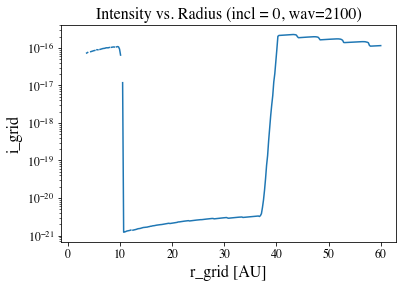

In [25]:
r_grid4, i_profile4 = i_vs_r(im4)

plt.plot(r_grid4,i_profile4)
plt.xlabel('r_grid [AU]')
plt.ylabel('i_grid')
plt.yscale('log')
plt.title("Intensity vs. Radius (incl = 0, wav=2100)")